In [1]:
import pyfiglet
font = pyfiglet.figlet_format("WQD 7002           Data Science Research Project-P2: 18//8/2022")
print(font)

__        _____  ____    _____ ___   ___ ____            
\ \      / / _ \|  _ \  |___  / _ \ / _ \___ \           
 \ \ /\ / / | | | | | |    / / | | | | | |__) |          
  \ V  V /| |_| | |_| |   / /| |_| | |_| / __/           
   \_/\_/  \__\_\____/   /_/  \___/ \___/_____|          
                                                         
 ____        _          ____       _                     
|  _ \  __ _| |_ __ _  / ___|  ___(_) ___ _ __   ___ ___ 
| | | |/ _` | __/ _` | \___ \ / __| |/ _ \ '_ \ / __/ _ \
| |_| | (_| | || (_| |  ___) | (__| |  __/ | | | (_|  __/
|____/ \__,_|\__\__,_| |____/ \___|_|\___|_| |_|\___\___|
                                                         
 ____                               _     
|  _ \ ___  ___  ___  __ _ _ __ ___| |__  
| |_) / _ \/ __|/ _ \/ _` | '__/ __| '_ \ 
|  _ <  __/\__ \  __/ (_| | | | (__| | | |
|_| \_\___||___/\___|\__,_|_|  \___|_| |_|
                                          
 ____            _           _        ____ ___

# FORECASTING AND ANALYSIS BRENT CRUDE OIL PRICES BASED ON COVID-19 AND RUSSIA-UKRAINE CONFLICTS


    Name: Ilani Dayana Binti Noor Azman
    Matric No: S2003292
    Supervisor Name: Dr.Woo Chaw Seng
    Programme: Master of Data Science
    Faculty: Computer Science and Information Technology
    Credit Hours: 6 credits

# 0. IMPORT DEPENDECIES

In [2]:
import pandas as pd
import numpy as np
import datetime
from copy import deepcopy
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import seaborn as sns
sns.set()
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from hmmlearn.hmm import GaussianHMM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
print("TensorFlow Version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

TensorFlow Version: 2.8.0
Num GPUs Available:  0


In [4]:
import matplotlib.pyplot as plt
import math
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pylab
sns.set(style='white')
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import lightgbm as lgb

In [5]:
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

# 1. LOAD DATA COLLECTION

In [6]:
df=pd.read_csv('Brent_Oil_1.csv')
df

Date   Price    Open    High     Low     Vol. Change %
0     2-Jan-20   66.25   66.41   66.58   65.72  205.69K    0.38%
1     3-Jan-20   68.60   66.28   69.50   66.22  479.70K    3.55%
2     6-Jan-20   68.91   69.35   70.74   68.21  341.14K    0.45%
3     7-Jan-20   68.27   68.63   68.75   67.65  284.92K   -0.93%
4     8-Jan-20   65.44   71.22   71.75   64.94  560.89K   -4.15%
..         ...     ...     ...     ...     ...      ...      ...
620  25-May-22  111.12  111.35  112.38  110.18  210.94K    0.39%
621  26-May-22  114.17  111.44  114.77  110.88  232.57K    2.74%
622  27-May-22  119.43  117.52  119.72  116.63   81.16K    4.61%
623  30-May-22  117.60  115.47  117.94  115.32  145.09K   -1.53%
624  31-May-22  122.84  122.20  125.28  121.60   11.56K    4.46%

[625 rows x 7 columns]

# 2. DATA PREPROCESSING

     2.1. Check The Number of Rows and Columns
     2.2. List All The Features In Dataset
     2.3. Display Data Type
     2.4. Checking Missing Value
     2.5. Plot Price Trade For Brent Crude Oil
     2.6. Data Summary
     2.7. Data Cleaning
         2.7.1. Removing Unwanted Feature(s)
     2.8. Data Summary (After Data Cleaning)
     2.9. Filling Date Gaps
         2.9.1. Makes Date Into Index
         2.9.2. Fill Date Gaps
         2.9.3. Fix The Date Columns

## 2.1. Check The Number of Rows and Columns

In [7]:
df.shape

(625, 7)

## 2.2. List All The Feautres in Dataset

In [8]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

## 2.3. Display Data Type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      625 non-null    object 
 1   Price     625 non-null    float64
 2   Open      625 non-null    float64
 3   High      625 non-null    float64
 4   Low       625 non-null    float64
 5   Vol.      625 non-null    object 
 6   Change %  625 non-null    object 
dtypes: float64(4), object(3)
memory usage: 34.3+ KB


## 2.4. Checking Missing Value

In [10]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
missing_table=missing_values_table(df)
missing_table

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

<AxesSubplot:>

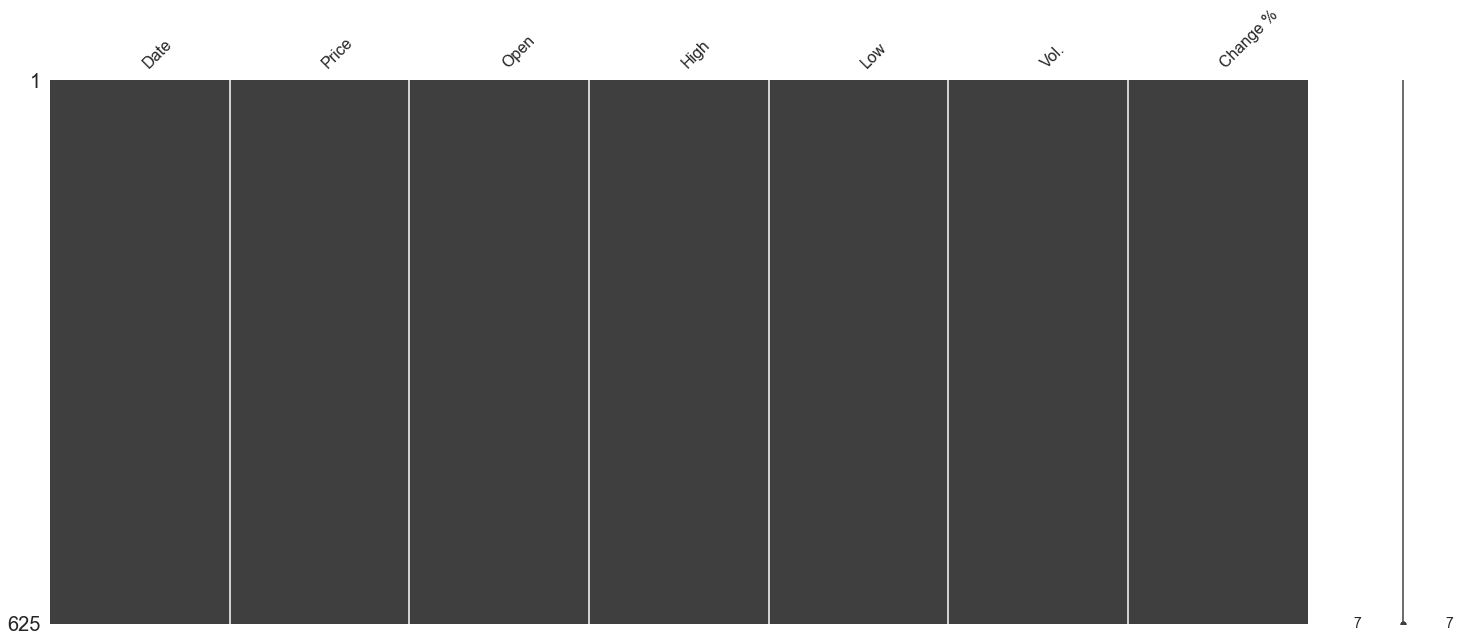

In [12]:
msno.matrix(df)

## 2.5. Plot The Price Trade For Brent Crude Oil

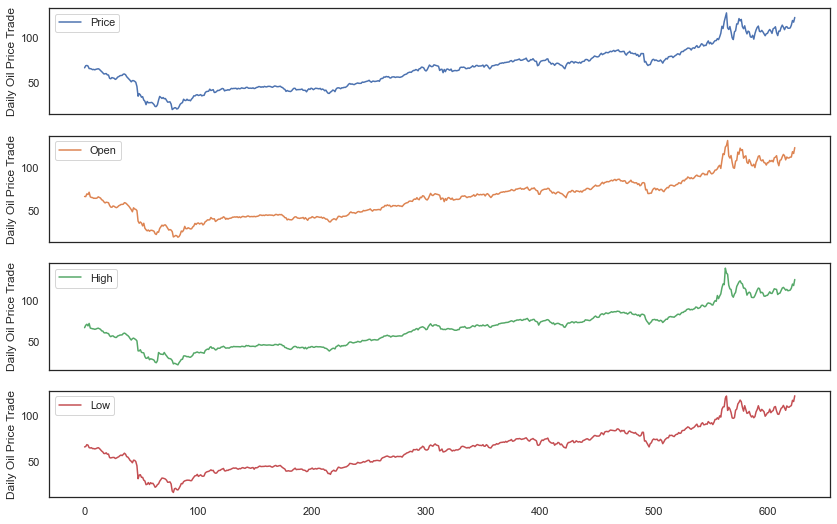

In [13]:
cols_plot = ['Price','Open','High','Low']
axes = df[cols_plot].plot(figsize=(14, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Oil Price Trade')

OBSERVATIONS:
- Oil trading is the buying and selling of different types of oil and oil-linked assets with the aim of making a profit. 
- As oil is a finite resource, its price can see massive fluctuations due to supply and demand changes. 
- This volatility makes it extremely popular among traders.
- This trade is based on COVID-19 and Russia-Ukraine conflict.
- The result shows the all the trade for price, open, high, and low is gaining increase for more than 100 means the change of trade was caused from Russia-Ukraine conflicts while the lowest points is from COVID-19 impact.

## 2.6. Data Summary

AIM: To show some summary statistics for whole features

In [14]:
df.describe()

Price        Open        High         Low
count  625.00000  625.000000  625.000000  625.000000
mean    64.80040   64.747856   65.999392   63.493152
std     23.24421   23.160240   23.686415   22.729662
min     19.33000   19.900000   21.290000   15.980000
25%     44.15000   43.840000   44.670000   43.240000
50%     65.32000   65.260000   66.300000   64.570000
75%     77.78000   77.260000   79.080000   75.750000
max    127.98000  130.280000  139.130000  121.600000

## 2.7. Data Cleaning

### 2.7.1. Removing Unwanted Feature(s)

In [15]:
df.drop(['Open','High','Low','Vol.','Change %'], axis=1, inplace=True)
df.head()

Date  Price
0  2-Jan-20  66.25
1  3-Jan-20  68.60
2  6-Jan-20  68.91
3  7-Jan-20  68.27
4  8-Jan-20  65.44

## 2.8. Data Summary (After Data Cleaning)

In [16]:
import plotly.graph_objects as go
import plotly.express as px


def analysi_basic_statistical(data, title):
    fig = go.Figure(
        data=[
            go.Table(
                header=dict(values=["Parameter", "Price"], font=dict(size=20)),
                cells=dict(
                    values=[
                        list(data.describe().index),
                        list(data.describe().round(2)["Price"]),
                    ],
                    align="left",
                    height=30,
                    font=dict(size=14),
                ),
            )
        ]
    )
    fig.update_layout(
        width=600, showlegend=False, title_text=title,
    )
    fig.show()
    return None


analysi_basic_statistical(df, "Statistical information for Brent Crude Oil Prices($)")

In [17]:
df.describe()

Price
count  625.00000
mean    64.80040
std     23.24421
min     19.33000
25%     44.15000
50%     65.32000
75%     77.78000
max    127.98000

In [18]:
df.describe(include='O')

Date
count        625
unique       625
top     2-Jan-20
freq           1

## 2.9. Filling Date Gaps

### 2.9.1. Makes Date Into Index

In [19]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index(['Date'],inplace=True)
df

Price
Date              
2020-01-02   66.25
2020-01-03   68.60
2020-01-06   68.91
2020-01-07   68.27
2020-01-08   65.44
...            ...
2022-05-25  111.12
2022-05-26  114.17
2022-05-27  119.43
2022-05-30  117.60
2022-05-31  122.84

[625 rows x 1 columns]

### 2.9.2. Fill Date Gaps

In [20]:
df = df.resample('D').pad()

### 2.9.3. Fix The Date Columns

In [21]:
df.Date = df.index.values
df.shape

(881, 1)

## 2.10. Feature Engineering

AIM: To make the algorithm work better by applying hardcoded transformations to the data before it goes to the machine learning model.

In [22]:
df=df.reset_index()

In [23]:
lag_features = ["Price"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Date", drop=False, inplace=True)

In [24]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["week"] = df.Date.dt.week
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

Date  Price  Price_mean_lag3  Price_mean_lag7  \
Date                                                             
2020-01-02 2020-01-02  66.25        64.637924        64.523872   
2020-01-03 2020-01-03  68.60        66.250000        66.250000   
2020-01-04 2020-01-04  68.60        67.425003        67.425003   
2020-01-05 2020-01-05  68.60        67.816666        67.816666   
2020-01-06 2020-01-06  68.91        68.599998        68.012497   

            Price_mean_lag30  Price_std_lag3  Price_std_lag7  Price_std_lag30  \
Date                                                                            
2020-01-02         63.934383        0.873224        1.448431         2.937149   
2020-01-03         66.250000        0.873224        1.448431         2.937149   
2020-01-04         67.425003        1.661701        1.661701         1.661701   
2020-01-05         67.816666        1.356773        1.356773         1.356773   
2020-01-06         68.012497        0.000000        1.175000         1.175000   

            month  week  day  day_of_week  
Date                                       
2020-01-02      1     1    2            3  
2020-01-03      1     1    3            4  
2020-01-04      1     1    4            5  
2020-01-05      1     1    5            6  
2020-01-06      1     2    6            0

In [25]:
df.describe()

Price  Price_mean_lag3  Price_mean_lag7  Price_mean_lag30  \
count  881.000000       881.000000       881.000000        881.000000   
mean    64.762531        64.637924        64.523865         63.934383   
std     23.275054        23.094625        22.912479         22.047981   
min     19.330000        20.343334        20.762857         26.230333   
25%     44.070000        43.720001        43.621429         43.696999   
50%     65.180000        65.180000        65.459999         65.430664   
75%     77.160000        76.376663        76.162857         75.527000   
max    127.980000       123.099998       119.097145        113.346664   

       Price_std_lag3  Price_std_lag7  Price_std_lag30       month  \
count      881.000000      881.000000       881.000000  881.000000   
mean         0.873224        1.448431         2.937148    5.925085   
std          1.073835        1.281432         2.058188    3.457379   
min          0.000000        0.133274         0.400292    1.000000   
25%          0.210079        0.643621         1.659208    3.000000   
50%          0.588586        1.046946         2.445868    5.000000   
75%          1.116647        1.714453         3.413187    9.000000   
max         10.284974        8.025697        11.175615   12.000000   

             week         day  day_of_week  
count  881.000000  881.000000   881.000000  
mean    24.200908   15.735528     3.001135  
std     15.189614    8.790968     2.001987  
min      1.000000    1.000000     0.000000  
25%     11.000000    8.000000     1.000000  
50%     22.000000   16.000000     3.000000  
75%     37.000000   23.000000     5.000000  
max     53.000000   31.000000     6.000000

In [26]:
df_train = df[df.Date < "2020"]
df_valid = df[df.Date >= "2022"]

exogenous_features = [
                        "Price_mean_lag3", "Price_mean_lag7", "Price_mean_lag30","Price_std_lag3","Price_std_lag7",
                        "Price_std_lag30","month",
                        "week","day","day_of_week"]

In [27]:
df_valid['Date'].describe()

count                     151
unique                    151
top       2022-01-01 00:00:00
freq                        1
first     2022-01-01 00:00:00
last      2022-05-31 00:00:00
Name: Date, dtype: object

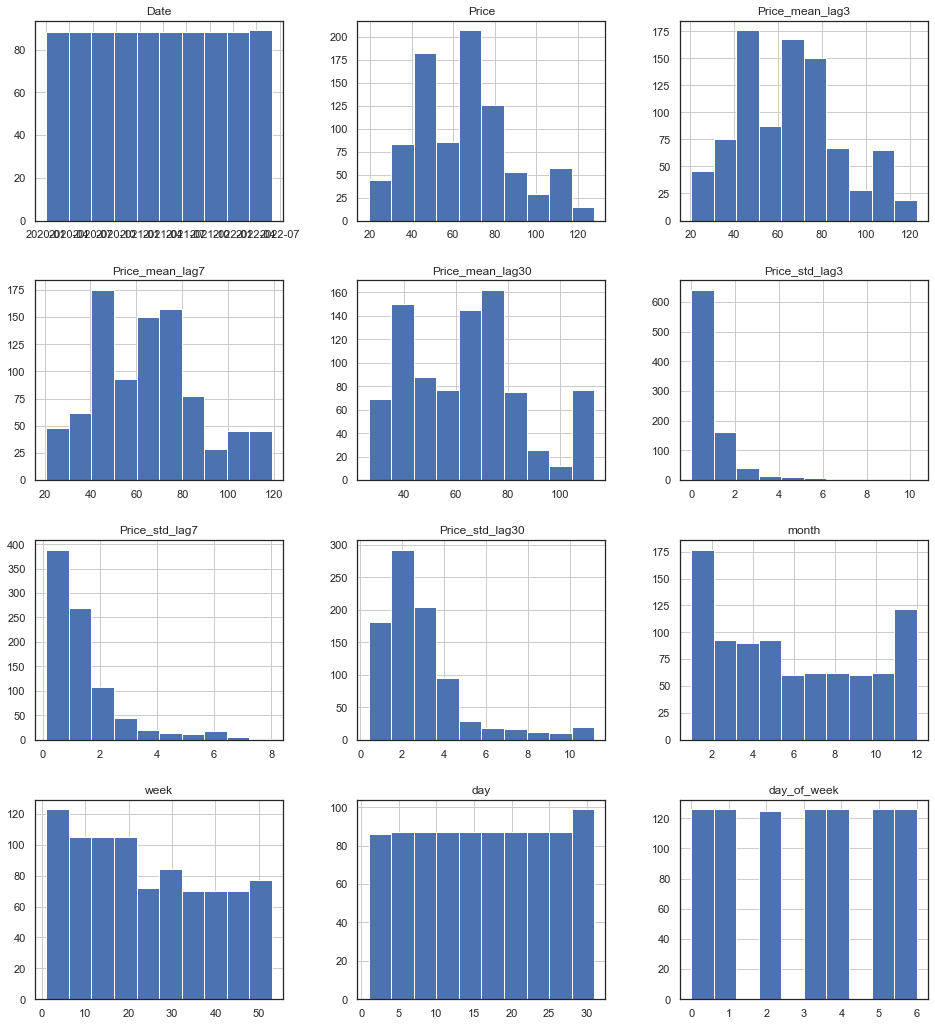

In [28]:
fig = plt.figure(figsize = (16,18))
ax = fig.gca()
hist=df.hist(ax = ax)

# 3. EXPLORATORY DATA ANALYSIS (EDA)

    3.1. Basic Data Visualisation and Plotting
         3.1.1. Histogram
         3.1.2. Kernel Density Estimate (KDE)
    3.2. Trend Analysis
         3.2.1. Trend Analysis In 2020 (COVID-19)
         3.2.2. Trend Analysis In 2021 (Economic Recovery)
         3.2.3. Trend Analysis Until 31 May 2022 (Russia-Ukraine Conflicts)
         3.2.4. Overall Trend Analysis From 2020-31 May 2022

## 3.1. Basic Data Visualisation and Plotting

### 3.1.1. Histogram

AIM: To show the frequencies of different data and an alternative way to display the distribution of a quantitative variable

In [29]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot

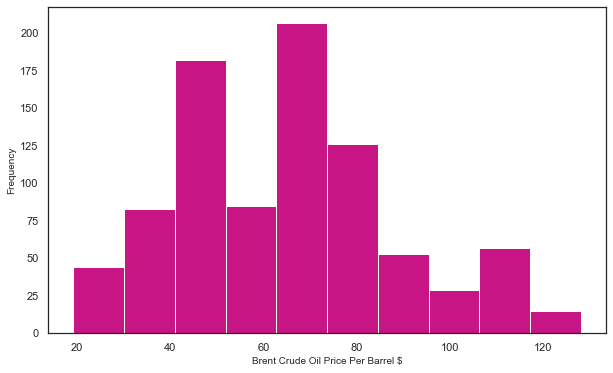

In [30]:
plt.figure(figsize = (10,6))
plt.hist(df['Price'], color = 'mediumvioletred')
plt.xlabel('Brent Crude Oil Price Per Barrel $', size = 10)
plt.ylabel('Frequency', size = 10)
plt.show()

### 3.1.2. Kernel Density Estimate (KDE)

AIM: For visualizing the distribution of observations in a dataset, analagous to a histogram. Is one of the nonparametric method for using a dataset to estimating probabilities for new points.

<AxesSubplot:xlabel='Price', ylabel='Density'>

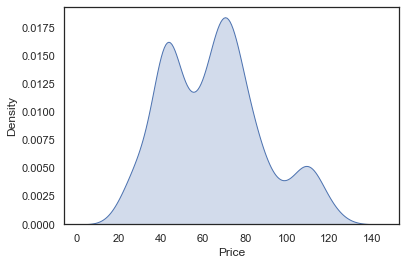

In [31]:
sns.kdeplot(df['Price'],shade=True)

<AxesSubplot:xlabel='Price', ylabel='Density'>

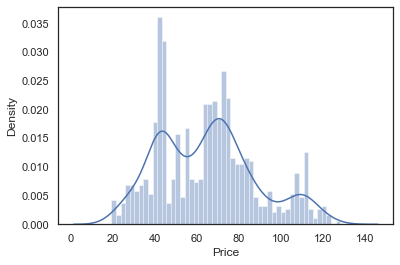

In [32]:
x=df['Price']
sns.distplot(x,bins=50)

## 3.2. Trend Analysis

AIM: To determine consistent movement based on COVID-19 and Russia-Ukraine direction and understand how the trend oil price has performed and predict where current oil prices operations and practices will take.

In [33]:
# Printing the start date and End date of the dataset
sd=df.iloc[0][0]
ed=df.iloc[-1][0]

print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2020-01-02 00:00:00
Ending Date 2022-05-31 00:00:00


### 3.2.1. Trend Analysis in 2020 (COVID-19)

In [34]:
fig = go.Figure([go.Scatter(x=df.loc['2020', 'Price'].index,y=df.loc['2020', 'Price'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='Trend of Brent Crude Oil Prices in 2020',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Price")

fig.show()

### 3.2.2. Trend Analysis in 2021 (Economics Recovering)

In [35]:
fig = go.Figure([go.Scatter(x=df.loc['2021', 'Price'].index,y=df.loc['2021', 'Price'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='Trend of Brent Crude Oil Prices in 2021',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Price")
fig.show()

### 3.2.3. Trend Analysis Until 31 May 2022 (Russia-Ukraine Conflicts)

In [36]:
fig = go.Figure([go.Scatter(x=df.loc['2022', 'Price'].index,y=df.loc['2022', 'Price'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='Trend of Brent Crude Oil Price Until 31 May 2022',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Price")
fig.show()

### 3.2.4. Overall Trend Analysis From 2020- 31 May 2022

In [37]:
import plotly.graph_objects as go
import plotly.express as px

def analysi_historical(df, title):
    fig = px.line(df, x="Date", y="Price")
    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list(
                [
                    dict(count=1, label="1 month", step="month", stepmode="backward"),
                    dict(count=3, label="3 months", step="month", stepmode="backward"),
                    dict(count=6, label="6 months", step="month", stepmode="backward"),
                    dict(count=1, label="1 year", step="year", stepmode="backward"),
                    dict(count=2, label="2 years", step="year", stepmode="backward"),
                    dict(count=4, label="3 years", step="year", stepmode="backward"),
                    dict(step="all"),
                ]
            )
        ),
    )
    fig.update_layout(title_text=title, title_font_size=20)
    fig.show()
    return None


analysi_historical(df, "Brent Crude Oil Prices From 2020-31 May 2022")

In [38]:
fig = go.Figure([go.Scatter(x=df.index, y=df['Price'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='Brent Crude Oil Prices From 2020-31 May 2022',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Price")
fig.show()

# 4. TIME SERIES ANALYSIS

    4.1. Analysis And Data Visualisation
         4.1.1. Time Series Analysis With Line Plot
         4.1.2. Time Series Lag Plot
    4.2. Moving Average (MA) And Exponential Weighted Moving Average (EWMA)
         4.2.1. Moving Average (MA)
         4.2.2. Exponential Weighted Moving Average (EWMA)
    4.3. Seasonality And Trends
    4.4. Data Decomposition
    4.5. Check Stationaruty
         4.5.1. Test Statistics
         4.5.2. Augmented Dickey-Fuller Test (ADF)
         4.5.3. Kwiatkowski-Phillips-Schmidt-Shin (KPSS)
    4.6. Time Series Transformation
         4.6.1. Differencing
         4.6.2. Log Transformation
         4.6.3. Plot Log Transformation
    4.7. Stationary Evaluation
    4.8. Model Identification

## 4.1. Analysis And Data Visualisation

### 4.1.1. Time Series Analysis With Line Plot

In [39]:
import pandas as pd
df=pd.read_csv('Brent_Oil_1.csv')
df.drop(['Open','High','Low','Vol.','Change %'], axis=1, inplace=True)
df.head()

Date  Price
0  2-Jan-20  66.25
1  3-Jan-20  68.60
2  6-Jan-20  68.91
3  7-Jan-20  68.27
4  8-Jan-20  65.44

In [40]:
df.columns = ['Date','Price']
df.head()

Date  Price
0  2-Jan-20  66.25
1  3-Jan-20  68.60
2  6-Jan-20  68.91
3  7-Jan-20  68.27
4  8-Jan-20  65.44

Text(0, 0.5, 'Price')

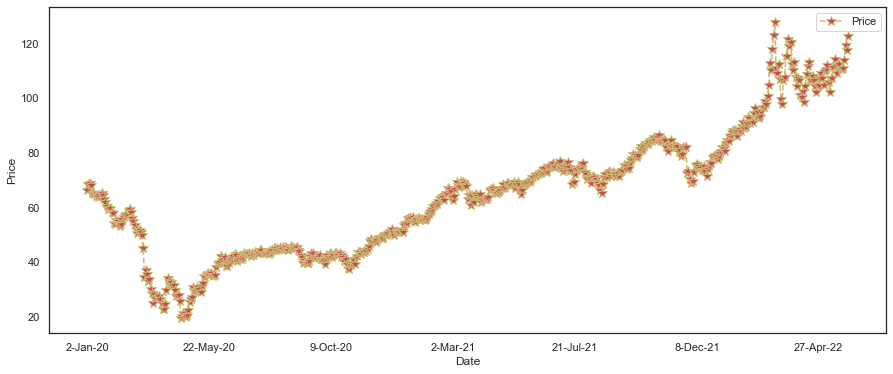

In [41]:
df.plot(x='Date',y='Price',figsize=(15,6),linestyle='--', marker='*', markerfacecolor='r',color='y',markersize=10)
plt.xlabel('Date')
plt.ylabel('Price')

OBSERVATIONS:
- This is a univariate data so will only have Date on X-axis and Price on Y-Axis.
- We can also choose the linestyle, marker color for each data points and marker size as well.
- This plot is quite informative and we can see an upward trend here.
- With every passing years the Price count is increasing and there is a seasonality in data also.


PS::(Seasonality: Every year the Price counts increases for a month and then goes down again and same effect is repeated every year. However, the Price is rapidly increase in 2022)

### 4.1.2. Time Series Lag Plot

- AIM: A lag plot helps to check if a time series data set is random or not. A random data will be evenly spread whereas a shape or trend indicates the data is not random.
- It is a scatter plot where one data point is plotted against the other with a fixed amount of lag. So a first order lag plot is using a lag of 1
- For plotting lag chart we can use Pandas lag_plot() function. The x-axis contains y(t) and y-axis contains the data point after 1 lag point i.e. y(t+1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

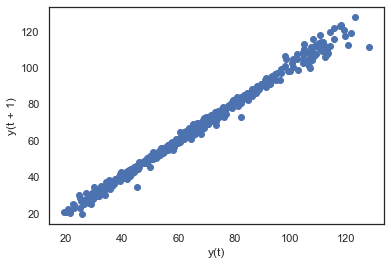

In [42]:
pd.plotting.lag_plot(df['Price'])

OBSERVATIONS:
- We can see a linear trend in our data and the data set is not random.
- There is no outliers as such also detected in this data set
- Lag can also be useful to identify the suitable time series model for the data.
- So looking at this linear trend for our data a Auto Regressive (AR) model will be good.

## 4.2. Moving Average (MA) And Exponential Weighted Moving Average (EWMA)

### 4.2.1. MA

- WHY? : Moving Average(MA) and Exponential Weighted Moving Average(EWMA) is a rolling window function and is very critical steps for time series analysis which is used to aggregate the data and compress it.

- AIM: These functions are used to smooth the data to remove outliers and noise from the data and allowing the patterns and trends in data more visible and standout. It will smooth out short-term fluctuations and highlight longer-term trends or cycles.

- HOW? : Moving Average is calculated by taking the mean of set of data within a fixed window size in a data set. The window size can start from 2 onwards.

In [43]:
df['rolling_mean']=df['Price'].rolling(12).mean()

### 4.2.2. EWMA

- Exponential Smoothing(EWMA) unlike moving average which doesn’t treat all the data points equally while smoothing. Most of the time in a Time series data we want to treat the most recent data with more weight than the previous data.,
- EWMA that we are weighting the more recent points higher than the lags or lesser recent points.
- In this study, we calculate the EWMA for our data using Pandas ewm() function with a smoothing level of 0.6. Can try with different alpha levels and check the output and use the most appropriate alpha level for your data

In [44]:
df['EWM_ALPHA_06'] = df['Price'].ewm(alpha=0.2).mean()

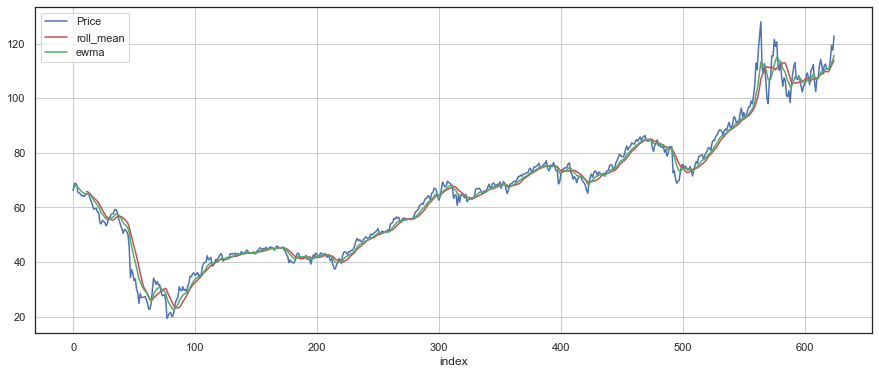

In [45]:
df.reset_index().plot(figsize=(15,6),kind='line',x = 'index', y = 'Price')
plt.grid(True)
plt.plot(df['rolling_mean'],label='roll_mean',color='r')
plt.plot(df['EWM_ALPHA_06'],label='ewma',color='g')
plt.legend(loc=2)
plt.show()

OBSERVATIONS:
- This is a line graph with three lines.
- Blue line shows the original data and red is for rolling mean with a window of 3 and green is for EWMA with a alpha 0.6
- The result shows the our data has been smoothing since roll mean and ewma is same directions with original data which is price

## 4.3. Seasonality And Trends

- SEASONALITY: Will check the Seasonality and Trend in data. In a time series , variations which occurs due to some factors (maybe natural) and operate in a regular and periodic manner over a span of less than or equal to one year is called as Seasonality.

- TREND: Trend in a time series shows an increasing, decreasing trend in the data over a long period of time

- Time Series modelling: The Trend and Seasonality should be eliminated from the data before hand. There are models like SARIMA which can handle Seasonality in the data but most of the models doesn’t

In [46]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index(['Date'],inplace=True)
df

Price  rolling_mean  EWM_ALPHA_06
Date                                          
2020-01-02   66.25           NaN     66.250000
2020-01-03   68.60           NaN     67.555556
2020-01-06   68.91           NaN     68.110656
2020-01-07   68.27           NaN     68.164634
2020-01-08   65.44           NaN     67.354117
...            ...           ...           ...
2022-05-25  111.12    110.119167    110.763289
2022-05-26  114.17    111.095000    111.444631
2022-05-27  119.43    112.088333    113.041705
2022-05-30  117.60    112.934167    113.953364
2022-05-31  122.84    113.875000    115.730691

[625 rows x 3 columns]

In [47]:
df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['month'] = pd.DatetimeIndex(df_temp.index).month

<AxesSubplot:title={'center':'Seasonality of the Time Series'}, xlabel='month', ylabel='Price'>

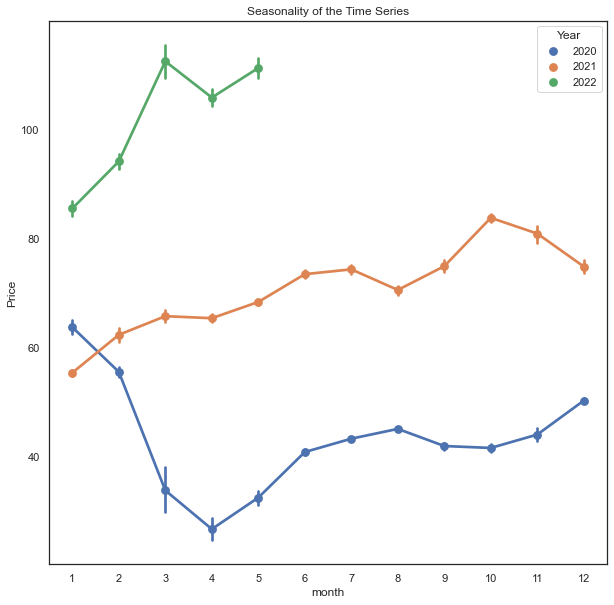

In [48]:
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='month',y='Price',hue='Year',data=df_temp)

## 4.4. Data Decomposition

- AIM: Decomposition helps to remove the seasonality from the data.
- Basically Decomposition has three components that is shown in the graphs below i.e Trend, Seasonality and Residual.
- We have to choose a model type also additive or multiplicative.
- In this study, we have taken an additive model because the seasonality doesn’t varies much from start to end of the years

In [49]:
df=pd.read_csv('Brent_Oil_1.csv')
df.drop(['Open','High','Low','Vol.','Change %'], axis=1, inplace=True)
df.head()

Date  Price
0  2-Jan-20  66.25
1  3-Jan-20  68.60
2  6-Jan-20  68.91
3  7-Jan-20  68.27
4  8-Jan-20  65.44

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose


def seasonal_decompose_and_graph(
    data,
    seasonal_type="additive",
    period=52,
    date_column="Date",
    value_column="Price",
    title="Seasonal analysis",
):
    res = seasonal_decompose(data[value_column], model=seasonal_type, period=period)
    df = {
        "observed": res.observed,
        "trend": res.trend,
        "seasonal": res.seasonal,
        "resid": res.resid,
    }
    res = pd.DataFrame(df)
    res.head()

    from plotly.subplots import make_subplots
    import plotly.graph_objects as go

    # Defining variables
    fig = make_subplots(shared_xaxes=True, rows=4, cols=1)
    x = data[date_column]
    y = res.observed
    z = res.trend
    k = res.seasonal
    w = res.resid

    # Ploting the lines
    fig.append_trace(go.Scatter(x=x, y=y,), row=1, col=1)
    fig.append_trace(go.Scatter(x=x, y=z,), row=2, col=1)
    fig.append_trace(go.Scatter(x=x, y=k), row=3, col=1)
    fig.append_trace(go.Scatter(x=x, y=w), row=4, col=1)

    # Update properties and descriptions
    fig.update_layout(height=700, width=1400, title_text=title)
    fig.update_xaxes(title_text="Date", row=4, col=1)
    fig.update_yaxes(title_text="Observed", row=1, col=1)
    fig.update_yaxes(title_text="Trend", row=2, col=1)
    fig.update_yaxes(title_text="Seasonal", row=3, col=1)
    fig.update_yaxes(title_text="Resid/Noise", row=4, col=1)
    fig.show()


seasonal_decompose_and_graph(
    df, period=5, title="Decomposition For Brent Crude Oil Price($)."
)

## 4.5. Check Stationarity

In [51]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index(['Date'],inplace=True)
df

Price
Date              
2020-01-02   66.25
2020-01-03   68.60
2020-01-06   68.91
2020-01-07   68.27
2020-01-08   65.44
...            ...
2022-05-25  111.12
2022-05-26  114.17
2022-05-27  119.43
2022-05-30  117.60
2022-05-31  122.84

[625 rows x 1 columns]

### 4.5.1. Test Statistics

In [52]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(timeseries):
    result = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print('The test statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('%s: %.3f' % (key, value))

In [53]:
check_stationarity(df.Price)

The test statistic: 0.926471
p-value: 0.993426
Critical Values:
1%: -3.441
5%: -2.866
10%: -2.569


### 4.5.2. Augmented Dickey-Fuller Test (ADF) 

In [54]:
print('Results of Dickey-Fuller Test')
df_test = adfuller(df)
df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
print(df_output)

Results of Dickey-Fuller Test
Test Statistic                   0.926471
p-value                          0.993426
#Lags Used                       8.000000
Number of Observations Used    616.000000
Critical Value (1%)             -3.441010
Critical Value (5%)             -2.866243
Critical Value (10%)            -2.569275
dtype: float64


OBSERVATIONS:
- The value of test statistics (0.926471) is more than 5% critical value (-2.866243).
- p-value (0.993426) is also more than 0.05 so we fail to reject the null hypothesis and Alternate Hypothesis.
- Thus, that time series is not stationary seems to be true.
- There is evidence of changing variance also so we will do a 'Differencing' and 'Log Transformation'.
- So, let's do timeseries transformation for further action, then test stationary again

## 4.6. Time Series Transformation

### 4.6.1. Differencing

In [55]:
df_diff = df.diff(periods = 1)
# Data transformation may add na values
df_diff.dropna(inplace = True)

In [56]:
print('Results of Dickey-Fuller Test')
df_test = adfuller(df_diff)
df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
print(df_output)

Results of Dickey-Fuller Test
Test Statistic                -1.073269e+01
p-value                        2.952061e-19
#Lags Used                     7.000000e+00
Number of Observations Used    6.160000e+02
Critical Value (1%)           -3.441010e+00
Critical Value (5%)           -2.866243e+00
Critical Value (10%)          -2.569275e+00
dtype: float64


### 4.6.2. Log Transformation

In [57]:
df_log = np.log(df)
df_log_diff = df_log.diff(periods =1) # First order differencing
df_log_diff.dropna(inplace = True)

In [58]:
print('Results of Dickey-Fuller Test')
df_test = adfuller(df_log_diff)
df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
print(df_output)

Results of Dickey-Fuller Test
Test Statistic                 -22.740553
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    623.000000
Critical Value (1%)             -3.440890
Critical Value (5%)             -2.866190
Critical Value (10%)            -2.569247
dtype: float64


### 4.6.3. Plot Log Different

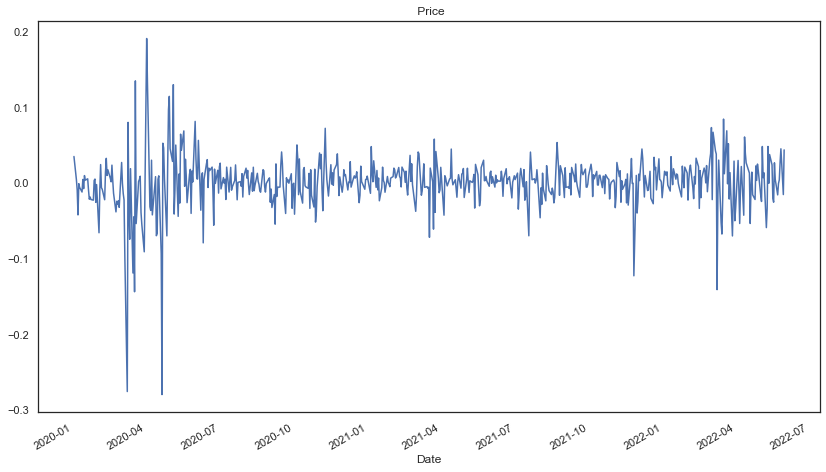

In [59]:
df_log_diff.plot(title=' Price', figsize=(14,8), legend=None);

OBSERVATIONS:
- These patterns have a lot of diversity.
- Show the y-axis begins at a value higher than 0 and less than 0, which is negative, between March and June 2020.
- This may give the appearance that data variation is more concerning the essentials of something than it actually is.

## 4.7. Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

In [60]:
from statsmodels.tsa.stattools import kpss
def kpss_test(df_log_diff, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(df_log_diff, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(df_log_diff)

KPSS Statistic: 0.2535710122866642
p-value: 0.1
num lags: 19
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


OBSERVATIONS:
- KPSS statistic (0.2535710122866642) is less than Critical Value (5%) (0.463).
- p-value is (0.1) which is more than 0.05, we fail to reject the null hypothesis of the KPSS test (cool!)


- Why? because;
      H0: p-value > 0.05, thus the time series is trend stationary.
      HA: p-value <= 0.05, thus the time series is not trend stationary.
- This means we can assume that the time series is trend stationary (nicee!)

## 4.8. Stationary Evaluation

- AIM: Data is stationary but just to showcase how data differencing works we will assume that our time series data is not stationary.Is data diffrence to determine value of "d".
- HOW?: We will do a log transform of the original data to make the seasonality same throughout the data.

In [61]:
import numpy as np
ts_temp_log = np.log(df)
ts_temp_log

Price
Date                
2020-01-02  4.193435
2020-01-03  4.228293
2020-01-06  4.232801
2020-01-07  4.223470
2020-01-08  4.181134
...              ...
2022-05-25  4.710611
2022-05-26  4.737689
2022-05-27  4.782730
2022-05-30  4.767289
2022-05-31  4.810883

[625 rows x 1 columns]

OBSERVATIONS:
- Basically we have to subtract the value with their previous value to get the difference in data.
- We will use numpy.diff() function to achieve that

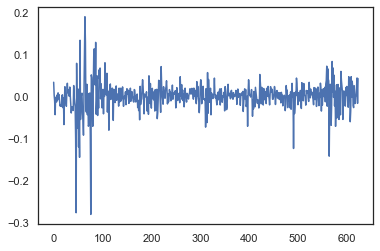

In [62]:
ts_temp_log_diff = np.diff(ts_temp_log.Price)
plt.plot(ts_temp_log_diff)

- The differenced data looks stationary so we don’t have to go for any further differencing.
- we will check again using ADF for double check.

In [63]:
# Check stationarity double check
check_stationarity(ts_temp_log_diff)

The test statistic: -22.740553
p-value: 0.000000
Critical Values:
1%: -3.441
5%: -2.866
10%: -2.569


OBSERVATIONS:
- Cool! This time the p-value is 0.000000 which is very good and the test statistics is also less than the 5% critical.
- The value of 'd' will be 1 because we have done the 1st difference data to achieve stationarity.

## 4.8. Model Identification

- Once our data is set to stationary then the next task is to determine the appropriate value of ARIMA model i.e. p and q.
- To determine "p" and "q" value based on ACF and PACF plot given.
- We can learn some important properties of our time series data with the help of Auto Correlation(ACF) and Partial Auto Correlation (PACF) graphs.
- This provide useful descriptive properties for understanding which model can be used for time series forecasting.
- ACF measures the linear relationships between observations at different time lags.
- In other words, ACF is used to understand if there exists a correlation between a time series data point with another point as a function of their time difference.
- The Partial Auto Correlation factor(PACF) is the partial correlation between the two points at a specific lag of time.
- Plotting the partial autocorrelative functions one could determine the appropriate lags p in an AR (p) model or in an extended ARIMA (p,d,q) model.

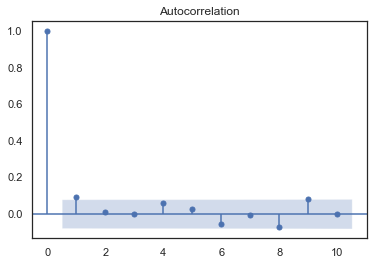

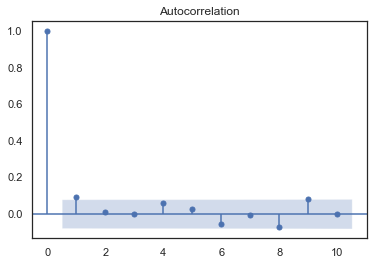

In [64]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts_temp_log_diff,lags=10)

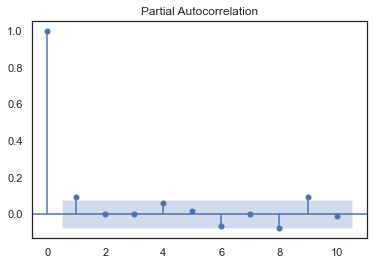

<Figure size 720x144 with 0 Axes>

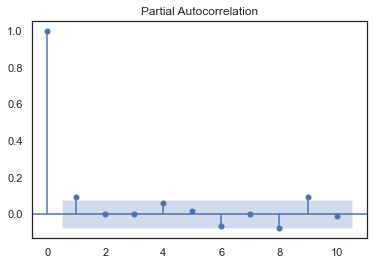

In [65]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10,2))
plot_pacf(ts_temp_log_diff,lags=10)

OBSERVATIONS:
- We have total 10 lags on X-axis and auto Correlation on the Y-axis and the line at Y=0 is the mean.
- PACF shows which data points are informative for specific lags and provides a contrast to the ACF.
- From the PACF plot we can see a significant correlation at lag of 2, 3, and 7.
- So the PACF suggests an AR(2,3,7) model.
- So an inital order for the model will be (2,1,2/3/7)
- Remember our d value is 1 because our data was stationary after differencing.

# 5. FORECASTING

    5.1. ARIMA Model
         5.1.1. Model Estimation
         5.1.2. Model Validation (Residual Diagnosis)
                5.1.2.1. Line Plot
                5.1.2.2. Density Plot
                5.1.2.3. Residual Summary
                5.1.2.4. Residual Plot
         5.1.3. Plot Actual vs Forecast
         5.1.4. Out-of-Time Cross Validation
         5.1.5. Model Forecast
                5.1.5.1. ARIMA Model Forecast Until 1st January 2023
         5.1.6. Forecast Interval
         5.1.7. Accuracy Metrics
         
    5.2. LSTM Model
         5.2.1. Preparing Data For LSTM Model
         5.2.2. Data Normalization
         5.2.3. Split Data Into Training and Testing
         5.2.4. Transform Data
         5.2.5. Build LSTM Model
         5.2.6. Plot Loss vs Validation Loss
         5.2.7. Plot Actual vs Forecast
                5.2.7.1. LSTM Model Forecast Last 15 Days Until 1st January 2023
                5.2.7.2. LSTM Forecast Until 1st January 2023
         5.2.8. Accuracy Metrics
         

## 5.1. ARIMA Model

- Now we have to fit our data to the ARIMA using the order of model (2,1,2/3/7) determined above using ACF and PACF plot.
- This sets the lag value to 2 for autoregression AR(2) and uses a data difference order of 1 since our time series is stationary after applying Differencing and Log Transformation method , and uses a moving average model of 2.

In [66]:
from statsmodels.tsa.arima_model import ARIMA    # ARIMA Modeling
from statsmodels.tsa.stattools import adfuller   # Augmented Dickey-Fuller Test for Checking Stationary
from statsmodels.tsa.stattools import acf, pacf  # Finding ARIMA parameters using Autocorrelation
from statsmodels.tsa.seasonal import seasonal_decompose # Decompose the ARIMA Forecast model

### 5.1.1. Model Estimation

I) ARIMA (2,1,2)

In [67]:
from statsmodels.tsa.arima_model import ARIMA
mod = ARIMA(df.Price,order=(2,1,2))
results = mod.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  624
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1314.413
Method:                       css-mle   S.D. of innovations              1.981
Date:                Sun, 14 Aug 2022   AIC                           2640.827
Time:                        21:13:34   BIC                           2667.444
Sample:                             1   HQIC                          2651.170
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0916      0.081      1.136      0.256      -0.066       0.250
ar.L1.D.Price    -0.1649      0.007    -22.729      0.000      -0.179      -0.151
ar.L2.D.Price    -0.9892      0.008   -1

II) ARIMA (2,1,3)

In [68]:
from statsmodels.tsa.arima_model import ARIMA
mod = ARIMA(df.Price,order=(2,1,3))
results = mod.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  624
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1317.164
Method:                       css-mle   S.D. of innovations              1.997
Date:                Sun, 14 Aug 2022   AIC                           2648.329
Time:                        21:13:38   BIC                           2679.382
Sample:                             1   HQIC                          2660.396
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0906      0.082      1.110      0.267      -0.069       0.251
ar.L1.D.Price    -1.3601      0.065    -20.903      0.000      -1.488      -1.233
ar.L2.D.Price    -0.9183      0.037    -

OBSERVATIONS:
- Looks like ARIMA (2,1,2) has better performance than ARIMA (2,1,3) since ARIMA(2,1,2) AIC 2640.827 is lower than ARIMA (2,1,3) AIC 2648.329.
- Cool! Also our p-value is less than 0.05 for ARIMA (2,1,2).

### 5.1.2. MODEL VALIDATION (RESIDUAL DIAGNOSIS)

- WHAT?: A model residuals is difference between the predicted and expected value and can be verified using the fitted model property resid().
- Residual object is of type ndarray so we will store it in a Dataframe for plotting.
- We visualize the residuals diagnosis using line plot and density plot for better understanding of residuals

#### 5.1.2.1. LINE PLOT

<AxesSubplot:xlabel='Date'>

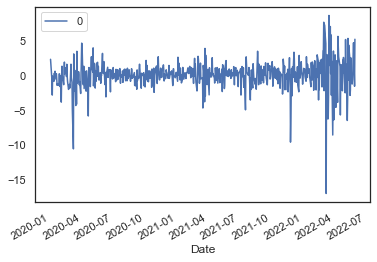

In [69]:
residuals = pd.DataFrame(results.resid)
residuals.plot()

OBSERVATIONS:
- In the above line plot we do see that has large residuals in 2022 while other than that is all of them are within their upper and lower limits

#### 5.1.2.2. DENSITY PLOT

- we check if these residuals are normally distributed and looks Gaussian or not.
- So, we will plot the density plot to check this. 

<AxesSubplot:ylabel='Density'>

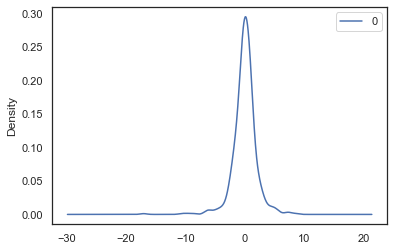

In [70]:
residuals.plot(kind='kde')

OBSERVATION:
- The mean of the residual is close to Zero and there is no significant correlation also that we can see in the pacf plot for residuals.
- The result shows this looks normal with a long left tail and centered at Zero

#### 5.1.2.3. RESIDUALS SUMMARY

In [71]:
residuals.describe()

0
count  624.000000
mean     0.000255
std      1.998964
min    -17.010287
25%     -0.736511
50%      0.068211
75%      0.883651
max      8.556013

#### 5.1.2.4. RESIDUALS PLOT

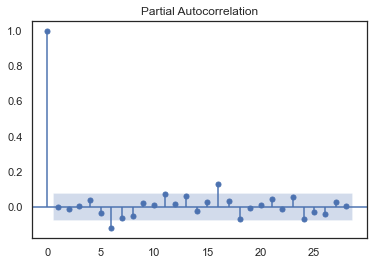

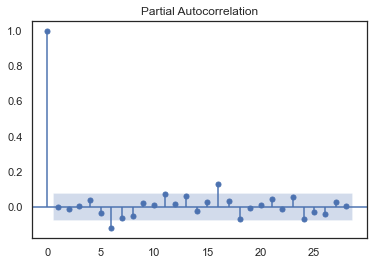

In [72]:
plot_pacf(residuals)

OBSERVATION: 
- The residual diagnostics looks like no white noise since 95% of our sample partial autocorrelations is between the two blue lines and it meets all our criteria for a good forecast and prediction

### 5.1.3. PLOT ACTUAL VS FORECAST

- We set dynamic=False the in-sample lagged values are used for prediction.

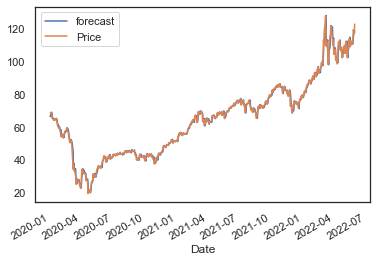

In [73]:
# Actual vs Fitted
results.plot_predict(dynamic=False)
plt.show()

OBSERVATIONS:
- That is, the model gets trained up until the previous value to make the next prediction. This can make the fitted forecast and actuals look artificially not good.
- Can’t say that at this point because we haven’t actually forecasted into the future and compared the forecast with the actual performance.
- So, the real validation we need now is the Out-of-Time cross-validation.

### 5.1.4. OUT-OF-TIME CROSS VALIDATION

- AIM: Take few steps back in time and forecast into the future to as many steps you took back. Then, we compare the forecast against the actuals.
- HOW: Need to create the training and testing dataset by splitting the time series into 2 contiguous parts in approximately 75:25 ratio or a reasonable proportion based on time frequency of series.
- ADD: The reason we are not sampling the training data randomly because the order sequence of the time series should be intact in order to use it for forecasting.

In [74]:
from statsmodels.tsa.stattools import acf
# Create Training and Test
train = df['Price'][:-200]
test = df['Price'][-200:]
print(train.shape, test.shape)

(425,) (200,)


In [75]:
train.describe()

count    425.000000
mean      52.470306
std       14.593322
min       19.330000
25%       41.990000
50%       51.290000
75%       66.110000
max       77.160000
Name: Price, dtype: float64

In [76]:
test.describe()

count    200.000000
mean      91.001850
std       15.025834
min       68.870000
25%       78.970000
50%       85.905000
75%      106.115000
max      127.980000
Name: Price, dtype: float64

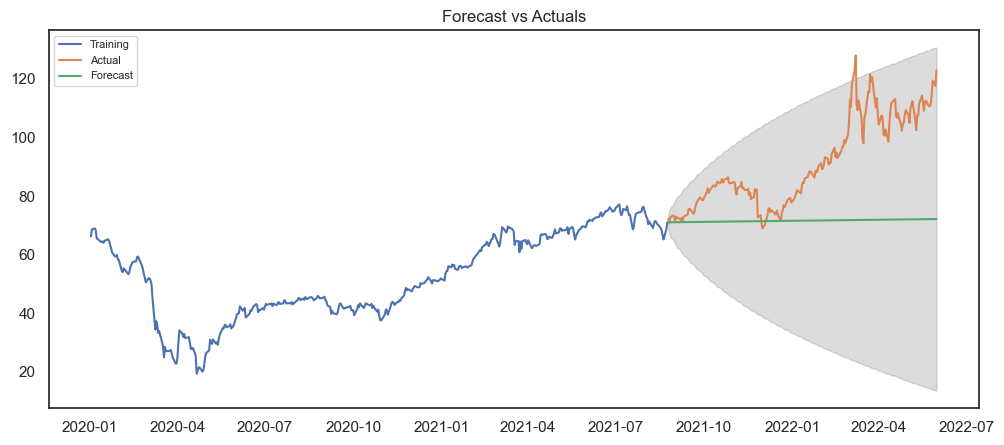

In [77]:
# Build Model 
model = ARIMA(train, order=(2, 1, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(200, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [78]:
from statsmodels.stats.diagnostic import acorr_ljungbox
tstat,pval = acorr_ljungbox(residuals)
tstat

array([2.20198062e-04, 1.12976831e-01, 1.16696962e-01, 1.06851265e+00,
       1.90076660e+00, 1.15098585e+01, 1.37685788e+01, 1.50892132e+01,
       1.53541712e+01, 1.53600227e+01, 1.87471922e+01, 1.92873945e+01,
       2.29304684e+01, 2.30287648e+01, 2.35821646e+01, 3.21938250e+01,
       3.22368291e+01, 3.75783825e+01, 3.80470908e+01, 3.81950073e+01,
       3.86723835e+01, 3.98759416e+01, 4.08342281e+01, 4.22734354e+01,
       4.23138748e+01, 4.26106784e+01, 4.32658226e+01, 4.32702896e+01,
       4.32855632e+01, 4.98306200e+01, 5.02882666e+01, 5.44656882e+01,
       5.44736326e+01, 5.47763645e+01, 5.47886560e+01, 5.54475252e+01,
       5.54497536e+01, 5.61294427e+01, 5.93482307e+01, 6.43076655e+01])

### 5.1.5. MODEL FORECAST

#### 5.1.5.1. ARIMA FORECAST UNTIL 1ST JANUARY 2023

In [79]:
# First 3 years i.e. from 2020 to 2023 which is 36 months
# Get forecast value, Stderr and Confidence Interval
n=36
forecast,err,ci = results.forecast(steps=n,alpha=0.05)

In [80]:
df_forecast = pd.DataFrame({'forecast':forecast},index=pd.date_range(start='2/1/2020', periods=n, freq='MS'))
df_forecast

forecast
2020-02-01  123.311623
2020-03-01  123.067529
2020-04-01  123.233959
2020-05-01  123.528645
2020-06-01  123.271883
2020-07-01  123.647383
2020-08-01  123.669338
2020-09-01  123.591529
2020-10-01  123.974089
2020-11-01  123.822102
2020-12-01  123.974396
2021-01-01  124.203723
2021-02-01  124.048840
2021-03-01  124.345793
2021-04-01  124.381024
2021-05-01  124.357291
2021-06-01  124.654108
2021-07-01  124.569083
2021-08-01  124.709041
2021-09-01  124.893652
2021-10-01  124.810917
2021-11-01  125.050803
2021-12-01  125.097396
2022-01-01  125.110617
2022-02-01  125.346738
2022-03-01  125.310331
2022-04-01  125.439900
2022-05-01  125.593994
2022-06-01  125.562308
2022-07-01  125.760786
2022-08-01  125.816818
2022-09-01  125.855227
2022-10-01  126.048421
2022-11-01  126.047270
2022-12-01  126.168308
2023-01-01  126.301628

### 5.1.6. FORECAST INTERVAL

In [81]:
# Checking Forecast Interval returned by forecast function
ci

array([[119.39767184, 127.22557376],
       [117.42592941, 128.70912815],
       [116.31789612, 130.15002155],
       [115.5757997 , 131.48148989],
       [114.33137969, 132.21238599],
       [113.87825301, 133.41651289],
       [113.1159419 , 134.22273484],
       [112.2866454 , 134.89641322],
       [112.00883659, 135.93934189],
       [111.1915856 , 136.45261852],
       [110.72651327, 137.22227781],
       [110.38020532, 138.02724157],
       [109.64172394, 138.45595542],
       [109.40623763, 139.28534756],
       [108.91657107, 139.84547656],
       [108.37504715, 140.33953518],
       [108.1929461 , 141.11526987],
       [107.62136031, 141.5168047 ],
       [107.29678766, 142.12129336],
       [107.03625365, 142.75105134],
       [106.50208363, 143.11974984],
       [106.31770679, 143.78389924],
       [105.94279505, 144.25199704],
       [105.53812643, 144.6831067 ],
       [105.37820009, 145.3152758 ],
       [104.94076451, 145.6798973 ],
       [104.68241997, 146.19738085],
 

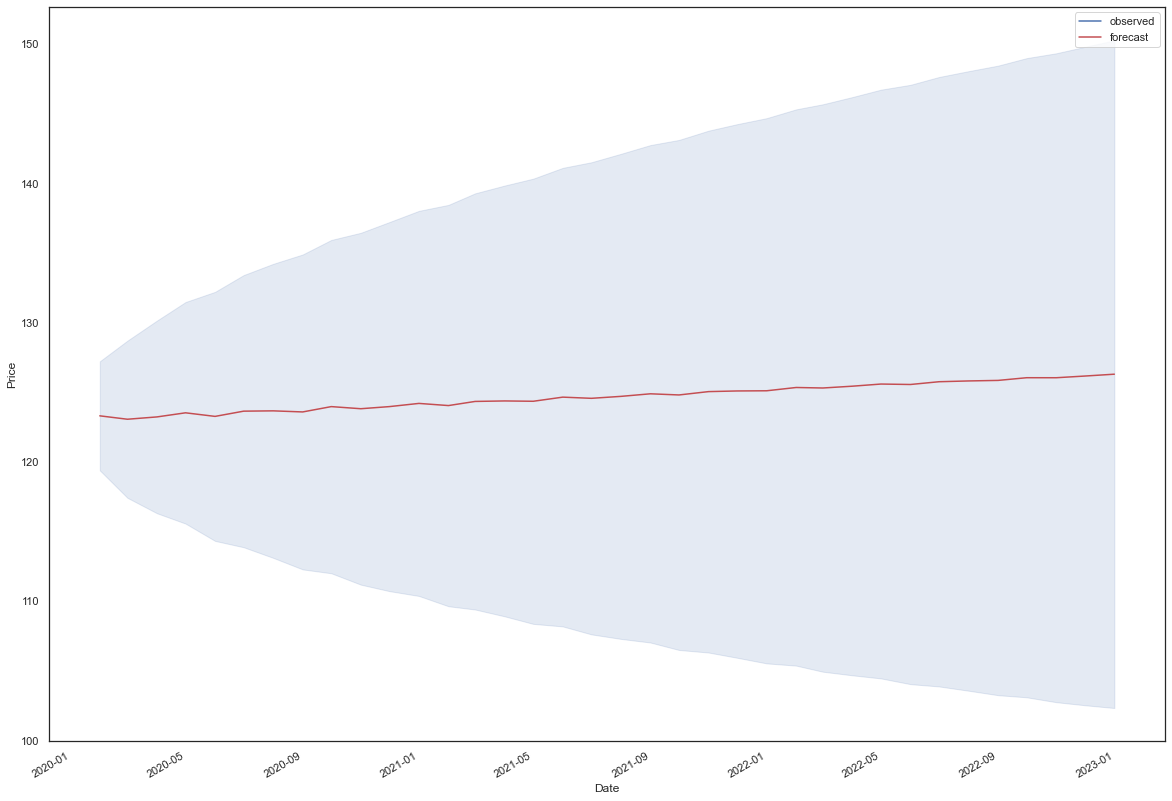

In [82]:
ax = df[1600:].Price.plot(label='observed', figsize=(20, 15))
df_forecast.plot(ax=ax,label='Forecast',color='r')
ax.fill_between(df_forecast.index,
                ci[:,0],
                ci[:,1], color='b', alpha=.15)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

### 5.1.7. ACCURACY METRICS

In [83]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    mse = np.mean(np.subtract(actual, forecast))**.5
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'mse':mse,'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)   

{'mape': 0.1942853939208205,
 'me': -19.43505023469693,
 'mae': 19.50142919024102,
 'mpe': -0.19333058533044897,
 'rmse': 24.37326902528502,
 'mse': 4.408520186490806,
 'acf1': 0.9658088336230762,
 'corr': 0.8675623518809994,
 'minmax': 0.1942727792296246}

## 5.2. LSTM MODEL

- We shall use LSTM network here which has the ability to capture long-term dependencies in a sequence (e.g. dependency between today‘s price and that 2 weeks ago). 
- Moreover, uni-variate series is being used here considering only the close price from the series.

In [84]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [85]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

### 5.2.1. PREPARING DATA FOR LSTM

In [86]:
df=pd.read_csv('Brent_Oil_1.csv')
df.drop(['Open','High','Low','Vol.','Change %'], axis=1, inplace=True)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)

In [146]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index(['Date'],inplace=True)
df

Price
Date              
2020-01-02   66.25
2020-01-03   68.60
2020-01-06   68.91
2020-01-07   68.27
2020-01-08   65.44
...            ...
2022-05-25  111.12
2022-05-26  114.17
2022-05-27  119.43
2022-05-30  117.60
2022-05-31  122.84

[625 rows x 1 columns]

In [87]:
# Lets First Take all the Price 
closedf = df[['Date','Price']]
print("Shape of Price Dataframe:", closedf.shape)

Shape of Price Dataframe: (625, 2)


In [88]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Price,labels={'Date':'Date','Price':'Close'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Timeframe of Brent Crude Oil Price 2020-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [89]:
closedf = closedf[closedf['Date'] > '2020-01-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  361


In [90]:
closedf

Date   Price
1     3-Jan-20   68.60
2     6-Jan-20   68.91
3     7-Jan-20   68.27
4     8-Jan-20   65.44
5     9-Jan-20   65.37
..         ...     ...
620  25-May-22  111.12
621  26-May-22  114.17
622  27-May-22  119.43
623  30-May-22  117.60
624  31-May-22  122.84

[361 rows x 2 columns]

In [91]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Price,labels={'Date':'Date','Price':'Price'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Period to Forecast Brent Crude Oil Prices($)', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### 5.2.2. DATA NORMALIZATION

- WHAT: Normalization is a technique often applied as part of data preparation for machine learning. 
- AIM: The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
MinMaxScaler. 
- HOW: For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [92]:
# deleting date column and normalizing using MinMax Scaler
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(361, 1)


### 5.2.3. SPLITING DATA INTO TRAINING AND TESTING 

In [93]:
# we keep the training set as 80% and 20% testing set

training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (288, 1)
test_data:  (73, 1)


### 5.2.4. TRANSFORM DATA 

- Transform the Price based on Time-series-analysis forecasting requirement , Here we will take 15

In [94]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [95]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (272, 15)
y_train:  (272,)
X_test:  (57, 15)
y_test (57,)


In [96]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (272, 15, 1)
X_test:  (57, 15, 1)


### 5.2.5. BUILD LSTM MODEL 

In [97]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [98]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
9/9 [==============================] - 2s 44ms/step - loss: 0.0779 - val_loss: 0.3219
Epoch 2/200
9/9 [==============================] - 0s 13ms/step - loss: 0.0603 - val_loss: 0.2601
Epoch 3/200
9/9 [==============================] - 0s 11ms/step - loss: 0.0433 - val_loss: 0.1979
Epoch 4/200
9/9 [==============================] - 0s 13ms/step - loss: 0.0261 - val_loss: 0.1225
Epoch 5/200
9/9 [==============================] - 0s 14ms/step - loss: 0.0124 - val_loss: 0.0555
Epoch 6/200
9/9 [==============================] - 0s 13ms/step - loss: 0.0075 - val_loss: 0.0217
Epoch 7/200
9/9 [==============================] - 0s 12ms/step - loss: 0.0074 - val_loss: 0.0183
Epoch 8/200
9/9 [==============================] - 0s 8ms/step - loss: 0.0064 - val_loss: 0.0234
Epoch 9/200
9/9 [==============================] - 0s 13ms/step - loss: 0.0057 - val_loss: 0.0243
Epoch 10/200
9/9 [==============================] - 0s 13ms/step - loss: 0.0053 - val_loss: 0.0198
Epoch 11/200
9/9 [==

### 5.2.6. PLOT LOSS VS VALIDATION LOSS 

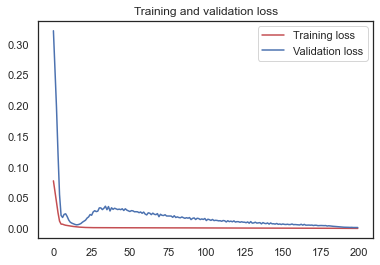

<Figure size 432x288 with 0 Axes>

In [99]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [100]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

((272, 1), (57, 1))

### 5.2.7. EVALUATION

In [101]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [102]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  2.4425928781240116
Train data MSE:  5.9662599682621416
Train data MAE:  1.5695599014618817
-------------------------------------------------------------------------------------
Test data RMSE:  4.840958406994858
Test data MSE:  23.43487829825419
Test data MAE:  3.5737234818307964


### 5.2.8. PLOT ACTUAL  VS FORECAST  

In [103]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index(['Date'],inplace=True)
df

Price
Date              
2020-01-02   66.25
2020-01-03   68.60
2020-01-06   68.91
2020-01-07   68.27
2020-01-08   65.44
...            ...
2022-05-25  111.12
2022-05-26  114.17
2022-05-27  119.43
2022-05-30  117.60
2022-05-31  122.84

[625 rows x 1 columns]

In [104]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Price'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (361, 1)
Test predicted data:  (361, 1)


### 5.2.8.1. LSTM FORECAST UNTIL 1ST JANAURY 2023 

In [105]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 184
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  184


## 5.11. PLOT LAST 15 DAYS AND NEXT FORECAST 184 DAYS

In [106]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33
  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199]


In [107]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 184 days price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


## 5.12. PLOT ALL BRENT CRUDE OIL PRICES WITH THE NEXT 184 DAYS 

In [108]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()